<a href="https://colab.research.google.com/github/amadousysada/ecommerce-customer-segmentation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OLIST DATABASE

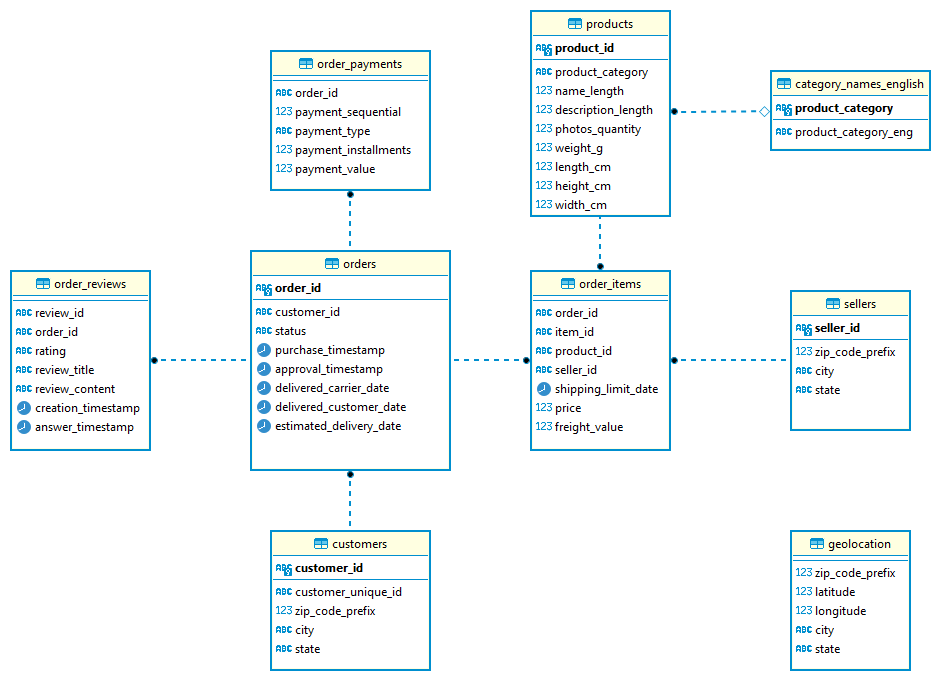

In [1]:
import pandas as pd
from sqlite3 import connect

# Requêtes SQL pour le Dashboard

* En excluant les commandes annulées, quelles sont les commandes
récentes de moins de 3 mois que les clients ont reçues avec au moins 3
jours de retard ?

* Qui sont les vendeurs ayant généré un chiffre d'affaires de plus de 100
000 Real sur des commandes livrées via Olist ?

* Qui sont les nouveaux vendeurs (moins de 3 mois d'ancienneté) qui
sont déjà très engagés avec la plateforme (ayant déjà vendu plus de 30
produits) ?

* Question : Quels sont les 5 codes postaux, enregistrant plus de 30
reviews, avec le pire review score moyen sur les 12 derniers mois ?

In [2]:
folder_path = "/content/drive/MyDrive/data/" # A ajuster selon le chemin où se trouve votre fichier .db

In [3]:
db_path = f"{folder_path}olist.db"
conn = connect(db_path)
cur = conn.cursor()

## Les tables de la base de données olist

In [4]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

            name
0      customers
1         geoloc
2    order_items
3    order_pymts
4  order_reviews
5         orders
6       products
7        sellers
8    translation


In [66]:
orders = pd.read_sql(
    """
    SELECT
      order_id,
      customer_id,
      order_status,
      order_purchase_timestamp,
      order_approved_at,
      order_delivered_carrier_date,
      order_delivered_customer_date,
      order_estimated_delivery_date
    FROM orders o
    WHERE o.order_status='delivered'
    """,
    conn
)
display(orders.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [76]:
items = pd.read_sql(
    """
    SELECT
      oi.order_id,
      COUNT(order_item_id) as nbre_items,
      SUM(price+freight_value) as total_price
    FROM order_items oi
    JOIN orders o on oi.order_id=o.order_id
    WHERE o.order_status='delivered'
    GROUP BY oi.order_id
    """,
    conn
)
display(items.head(1100))

,order_id,nbre_items,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,259.83
2,000229ec398224ef6ca0657da4fc703e,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
...,...,...,...
1095,02ef9aa8b6692c2ff049065f5a150c28,1,45.21
1096,02efbfba398618f44f8c4097d6822ddd,1,37.37
1097,02f0618d94e9aeeb35a81835fa5c64d7,2,280.64
1098,02f1d13053a2833d022b8921ee3411a3,1,94.71


In [35]:
customers = pd.read_sql(
    """
    SELECT
      c.customer_id,
      customer_unique_id,
      customer_zip_code_prefix,
      customer_city,
      customer_state
    FROM customers c
    JOIN orders o on o.customer_id=c.customer_id
    """,
    conn
)
display(customers.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [71]:
reviews = pd.read_sql(
    """
    SELECT
      r.order_id,
      COUNT(review_id) as total_reviews,
      AVG(review_score) as mean_score
    FROM order_reviews r
    JOIN orders o on o.order_id=r.order_id
    WHERE o.order_status='delivered'
    GROUP BY r.order_id
    """,
    conn
)
display(reviews.head())

,order_id,total_reviews,mean_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0


In [62]:
set(list(orders.order_id)).difference(set(list(reviews.order_id)))

{'00143d0f86d6fbd9f9b38ab440ac16f5',
 '00335b686d693c7d72deeb12f8e89227',
 '00a77f9cc25b05b2004752593d7b8888',
 '00aa423621f35a9ca6c6240f275b0640',
 '016754282c7690ebd6658f9f8e0a49bb',
 '01efe0209a92b2f21f6e0edee4bd4eb6',
 '02190241f7190a1f3c7e0df95a749c6a',
 '021f26893462ec6a677baba7f06ce4c1',
 '023faf5fac58639f7cf53cb7dd219859',
 '028e1ce5e085cc7810f340572c316b35',
 '02c8a77069dc7fd1cf273312c3a6e499',
 '03343a88c4d669e6378c5aedc4147919',
 '038345c4a9d21c17180f2f77e1701c69',
 '03a3628434dd670dd5b9896337451c86',
 '046cf9d36030cfd64e9800b0006f5713',
 '049c844d7707d97ba1600196919474f4',
 '05a82511dd29bef74d8003b015912fd6',
 '05cd156f0f47579a36d7a52724fc31b8',
 '066fbbe8fc3345df85f0f1dc2ad03bce',
 '07e74b39ce62a7c6f7063b3168748191',
 '07ff1545b26c5800dc2d25ab88055082',
 '0823dcbe6114c3aab2fc53d98117d916',
 '084ac8d010dca0cb81b1bd4f375a047e',
 '097dcfb34c6a0d697daa747d943dc1e8',
 '0996d6fb4402593986c6b1541bfcb4cc',
 '0a0d4509c14ceb9b0f6555e07c45d167',
 '0a92bad75c24fdf33ed2a18801262e89',
 

In [63]:
orders[orders.order_id=="e884a5f13002803a9e393c21d0c1b257"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
16075,e884a5f13002803a9e393c21d0c1b257,cb6967ba89bf0c0146e4cb9eeb5b440d,delivered,2017-08-16 13:10:41,2017-08-16 13:30:18,2017-08-18 13:44:40,2017-09-05 17:00:13,2017-09-18 00:00:00


In [64]:
reviews[reviews.order_id=="e884a5f13002803a9e393c21d0c1b257"]

,order_id,total_reviews,mean_score


In [55]:
reviews[reviews.nbre_review >1]

,order_id,nbre_review,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
81,0035246a40f520710769010f752e7507,2,5,None,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
450,013056cfe49763c6f66bda03396c5ee3,2,4,None,None,2018-03-04 00:00:00,2018-03-05 17:02:00
538,0176a6846bcb3b0d3aa3116a9a768597,2,5,None,None,2017-12-30 00:00:00,2018-01-02 10:54:06
812,02355020fd0a40a0d56df9f6ff060413,2,1,None,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19
961,029863af4b968de1e5d6a82782e662f5,2,5,None,None,2017-07-14 00:00:00,2017-07-17 13:58:06
...,...,...,...,...,...,...,...
94964,fd95ae805c63c534f1a64589e102225e,2,5,None,"Recebi dentro do prazo estabelecido, produtos ...",2018-03-04 00:00:00,2018-03-06 10:10:08
95122,fe041ba1c9f54016432fa6ee91709dbc,2,5,None,None,2017-12-20 00:00:00,2017-12-20 22:04:37
95639,ff763b73e473d03c321bcd5a053316e8,2,3,None,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48
95656,ff850ba359507b996e8b2fbb26df8d03,2,5,None,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55


In [72]:
payments = pd.read_sql(
    """
    SELECT
      *
    FROM order_pymts op
    JOIN orders o on o.order_id=op.order_id
    WHERE o.order_status='delivered'
    """,
    conn
)
display(payments.columns)

Index(['index', 'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'index', 'order_id',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [81]:
payments = pd.read_sql(
    """
    SELECT
      p.order_id,
      MAX(payment_installments) as payment_installments,
      SUM(payment_value) as payment_value
    FROM order_pymts p
    JOIN orders o on o.order_id=p.order_id
    WHERE o.order_status='delivered'
    GROUP BY p.order_id
    """,
    conn
)
display(payments.head())

,order_id,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,3,259.83
2,000229ec398224ef6ca0657da4fc703e,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,3,218.04
